# For happy

In [160]:
import os 
import json

In [161]:
IMG_NAME_LIST = ['ha_367.png', 'ha_84.png', 'ha_207.png', 'ha_2.png', 'ha_212.png', 'ha_399.png', 'ha_428.png', 'ha_172.png', 'ha_50.png', 'ha_1.png', 'ha_407.png', 'ha_201.png', 'ha_215.png', 'ha_5.png', 'ha_348.png', 'ha_54.png', 'ha_412.png', 'ha_174.png', 'ha_404.png', 'ha_202.png', 'ha_43.png', 'ha_377.png', 'ha_149.png', 'ha_106.png', 'ha_24.png', 'ha_476.png', 'ha_310.png', 'ha_489.png', 'ha_477.png', 'ha_311.png', 'ha_19.png', 'ha_107.png', 'ha_139.png', 'ha_111.png', 'ha_33.png', 'ha_27.png', 'ha_475.png', 'ha_32.png', 'ha_110.png', 'ha_128.png', 'ha_262.png', 'ha_288.png', 'ha_303.png', 'ha_301.png', 'ha_315.png', 'ha_329.png', 'ha_249.png', 'ha_314.png', 'ha_466.png', 'ha_116.png', 'ha_11.png', 'ha_443.png', 'ha_292.png', 'ha_244.png', 'ha_442.png', 'ha_132.png', 'ha_130.png', 'ha_124.png', 'ha_454.png', 'ha_497.png', 'ha_252.png', 'ha_284.png', 'ha_482.png', 'ha_131.png', 'ha_119.png', 'ha_451.png', 'ha_243.png', 'ha_257.png', 'ha_256.png', 'ha_16.png', 'ha_450.png', 'ha_122.png', 'ha_320.png', 'ha_334.png', 'ha_491.png', 'ha_268.png', 'ha_296.png', 'ha_241.png', 'ha_233.png', 'ha_384.png', 'ha_186.png', 'ha_151.png', 'ha_145.png', 'ha_184.png', 'ha_59.png', 'ha_9.png', 'ha_393.png', 'ha_344.png', 'ha_422.png', 'ha_185.png', 'ha_152.png', 'ha_368.png', 'ha_235.png', 'ha_221.png', 'ha_382.png', 'ha_396.png', 'ha_341.png', 'ha_380.png', 'ha_381.png', 'ha_342.png']

print(len(IMG_NAME_LIST))

100


In [175]:
# utils
# run this first
def read_json_file(filePath):
    with open(filePath) as f:
        data = json.load(f)
    return data

def read_folder_of_data(exp, folderPath):
    fileNames = sorted(os.listdir(folderPath))
    results = []
    for i in fileNames:
        temp_res = []
        temp = os.path.join(folderPath, i)
        # print(temp)
        tempdata = read_json_file(temp)
        
        cleanedList = generateCleanList(exp, tempdata)
        temp_res = mergeFromPairwiseRating(cleanedList)
        temp_res.reverse()
        
        # print(temp_res)
        # deep copy problem
        results.append([temp, temp_res[:]])
    return results
        

def getImg(exp, img):
    if exp == 'happy':
        return img[121:] # happiness_selected_imgonly100/ha_106
    elif exp=='fear':
        return img[112:]
    else:
        raise Exception 

def generateCleanList(exp, temp_json):
    cleanedList = []
    for i in temp_json["payload"]['pairwise_rating']:
        tempimg1 = getImg(exp, i[0])
        tempimg2 = getImg(exp, i[1])
        cleanedList.append([tempimg1, tempimg2, i[2]])
    return cleanedList


def compare(img1, img2, reflist):
    for i in reflist:
        print(i)
        print(img1, img2)
        if (i[0] == img1 and i[1] == img2) or (i[0] == img2 and i[1] == img1):
            return i[2]
    raise Exception("Image not found in list", img1, img2)

def mergeSortPairwiseRecursive(alist, reflist):
    # Base case: if there is only one image, return it
    if (len(alist) <= 1):
        return alist

    # Recursive case: if there are more than one image, split the list into two halves
    mid = len(alist)//2
    lefthalf = alist[:mid]
    righthalf = alist[mid:]

    # Recursive call: sort the two halves
    mergeSortPairwiseRecursive(lefthalf, reflist)
    mergeSortPairwiseRecursive(righthalf, reflist)

    # Merge the two halves
    merged = []
    i, j = 0, 0
    while i < len(lefthalf) and j < len(righthalf):
        cmp = compare(lefthalf[i], righthalf[j], reflist)
        if cmp == -1:
            merged.append(lefthalf[i])
            i += 1
        elif cmp == 1:
            merged.append(righthalf[j])
            j += 1
        else:
            raise Exception("Comparison not found in list")

    # Add the remaining elements
    while i < len(lefthalf):
        merged.append(lefthalf[i])
        i += 1
    while j < len(righthalf):
        merged.append(righthalf[j])
        j += 1

    return merged

def swap(target_list, posa, posb):
    # print('swap', posa, posb)
    target_list[posa], target_list[posb] = target_list[posb], target_list[posa]
    return target_list

def mergeOnlyPairwise(raw_list, raw_ref_list):
    temp_list = raw_list
#     print(raw_ref_list)
    for i in raw_ref_list:
        if i[2] == -1 and temp_list.index(i[0]) < temp_list.index(i[1]):
            temp_list = swap(temp_list, temp_list.index(i[0]), temp_list.index(i[1]))
        elif i[2] == 1 and temp_list.index(i[0]) > temp_list.index(i[1]):
            temp_list = swap(temp_list, temp_list.index(i[0]), temp_list.index(i[1]))

    return temp_list

# write a merge sort function in python
def mergeFromPairwiseRating(cleanedList):
    # ha
    mergeList = IMG_NAME_LIST
    # fear
#     mergeList = ['fe_1.png', 'fe_10.png', 'fe_11.png', 'fe_110.png', 'fe_125.png', 'fe_128.png', 'fe_143.png', 'fe_147.png', 'fe_150.png', 'fe_151.png', 'fe_153.png', 'fe_159.png', 'fe_16.png', 'fe_166.png', 'fe_17.png', 'fe_173.png', 'fe_174.png', 'fe_181.png', 'fe_184.png', 'fe_185.png', 'fe_191.png', 'fe_193.png', 'fe_197.png', 'fe_2.png', 'fe_201.png', 'fe_202.png', 'fe_203.png', 'fe_204.png', 'fe_206.png', 'fe_207.png', 'fe_211.png', 'fe_212.png', 'fe_22.png', 'fe_226.png', 'fe_232.png', 'fe_236.png', 'fe_237.png', 'fe_238.png', 'fe_249.png', 'fe_253.png', 'fe_26.png', 'fe_260.png', 'fe_271.png', 'fe_279.png', 'fe_287.png', 'fe_29.png', 'fe_291.png', 'fe_30.png', 'fe_300.png', 'fe_303.png', 'fe_307.png', 'fe_313.png', 'fe_336.png', 'fe_34.png', 'fe_340.png', 'fe_345.png', 'fe_349.png', 'fe_356.png', 'fe_362.png', 'fe_364.png', 'fe_376.png', 'fe_38.png', 'fe_380.png', 'fe_381.png', 'fe_382.png', 'fe_385.png', 'fe_39.png', 'fe_390.png', 'fe_393.png', 'fe_396.png', 'fe_402.png', 'fe_406.png', 'fe_408.png', 'fe_417.png', 'fe_42.png', 'fe_420.png', 'fe_427.png', 'fe_43.png', 'fe_431.png', 'fe_441.png', 'fe_442.png', 'fe_449.png', 'fe_451.png', 'fe_46.png', 'fe_472.png', 'fe_473.png', 'fe_475.png', 'fe_477.png', 'fe_484.png', 'fe_499.png', 'fe_5.png', 'fe_53.png', 'fe_57.png', 'fe_59.png', 'fe_69.png', 'fe_7.png', 'fe_8.png', 'fe_84.png', 'fe_90.png', 'fe_91.png', 'fe_93.png', 'fe_95.png']
    
    mergeListPairwiseRef = []
    for i in cleanedList:
        mergeListPairwiseRef.append([i[0] + '.png', i[1] + '.png', i[2]])

    import copy
    counter = 0
    last_list = []
    new_list = mergeOnlyPairwise(mergeList, mergeListPairwiseRef)
    for i in range(100):
        # if new_list == last_list:
        if all(x == y for x, y in zip(new_list, last_list)):
            if counter < 5:
                print(i, 'done')
                counter += 1
            last_list = copy.deepcopy(new_list)
        else:
            last_list = copy.deepcopy(new_list)
        new_list = mergeOnlyPairwise(new_list, mergeListPairwiseRef)
    
    return new_list

def mergeFromPairwiseRatingNum(numlist, cleanedList):
    mergeList = numlist
    mergeListPairwiseRef = cleanedList

    import copy
    counter = 0
    last_list = []
    new_list = mergeOnlyPairwise(mergeList, mergeListPairwiseRef)
    for i in range(100):
        if all(x == y for x, y in zip(new_list, last_list)):
            if counter < 5:
                print(i, 'done')
                counter += 1
            last_list = copy.deepcopy(new_list)
        else:
            last_list = copy.deepcopy(new_list)
        new_list = mergeOnlyPairwise(new_list, mergeListPairwiseRef)
    
    return new_list



In [176]:
import os 
import json

In [177]:
# files
base_path = './data/happy/'
filenames = os.listdir(base_path)

filenames.sort()

In [178]:
popflag = False
for i in range(len(filenames)):
    if '.DS_Store' not in filenames[i]:
        filenames[i] = os.path.join(base_path, filenames[i])
    else:
        popflag = True
if popflag:
    filenames.pop(0)

In [179]:
filenames

['./data/happy/1_zhengliang.json',
 './data/happy/2_zitang.txt',
 './data/happy/3_yenju.txt',
 './data/happy/4_dongsheng.txt',
 './data/happy/dongagent.txt']

In [180]:
happy_data = read_folder_of_data('happy', 'data/happy/')
# print(happy_data)
result = happy_data


0 done
6 done
7 done
8 done
9 done
0 done
14 done
15 done
16 done
17 done
0 done
14 done
15 done
16 done
17 done
0 done
12 done
13 done
14 done
15 done
0 done
9 done
10 done
11 done
12 done


In [181]:
len(happy_data[0][1])

100

# Participant analysis

# Happy

In [182]:
# get 'ground truth' pyfeat rank order
with open("data/raw_data/happy_raw.json", 'r') as f:
    ha_raw = json.load(f)


ha_raw_name_only = [x[0] for x in ha_raw]
# print(fear_raw_name_only) # high to low # descending

temp = filter(lambda x: x in happy_data[0][1], ha_raw_name_only)
ha_name_rank_order_pyfeat = list(enumerate(list(temp)))
ha_name_rank_order_pyfeat = {x[1]:x[0] for x in ha_name_rank_order_pyfeat}



In [183]:
aver_ranking = list(ha_name_rank_order_pyfeat.items())
for i, c in enumerate(aver_ranking):
    aver_ranking[i] = [c[0], 0]

for i in range(len(result)):
    temp_data = list(enumerate(result[i][1]))
    temp_list = []
    for i, c in enumerate(temp_data):
        temp_list.append((c, ha_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])
    # print(temp_list)
    for i, c in enumerate(aver_ranking):
        if c[0] == temp_list[i][0][1]:
            aver_ranking[i][1] += temp_list[i][0][0]

In [184]:
aver_ranking_new = list(enumerate(aver_ranking))
aver_ranking_new.sort(key=lambda x:x[1][1], reverse=False)
# print(aver_ranking_new)
# 'fe_307.png'
# 'fe_26.png'
POPLIST = []

In [185]:
# clean data
cleaned_result = []
for i, c in enumerate(result):
    temp_c = c[1]
    # print(temp_c)
    temp_c_cleanned = []
    for d in temp_c:
        if d not in POPLIST:
            temp_c_cleanned.append(d)
    cleaned_result.append([i+1, temp_c_cleanned])

In [186]:
temp = filter(lambda x: x in cleaned_result[0][1], ha_raw_name_only)
ha_name_rank_order_pyfeat = list(enumerate(list(temp)))
ha_name_rank_order_pyfeat = {x[1]:x[0] for x in ha_name_rank_order_pyfeat}

print(ha_name_rank_order_pyfeat)

{'ha_152.png': 0, 'ha_348.png': 1, 'ha_184.png': 2, 'ha_497.png': 3, 'ha_342.png': 4, 'ha_368.png': 5, 'ha_201.png': 6, 'ha_491.png': 7, 'ha_32.png': 8, 'ha_185.png': 9, 'ha_301.png': 10, 'ha_249.png': 11, 'ha_311.png': 12, 'ha_450.png': 13, 'ha_341.png': 14, 'ha_256.png': 15, 'ha_221.png': 16, 'ha_443.png': 17, 'ha_412.png': 18, 'ha_33.png': 19, 'ha_243.png': 20, 'ha_407.png': 21, 'ha_344.png': 22, 'ha_329.png': 23, 'ha_476.png': 24, 'ha_202.png': 25, 'ha_212.png': 26, 'ha_422.png': 27, 'ha_442.png': 28, 'ha_27.png': 29, 'ha_384.png': 30, 'ha_235.png': 31, 'ha_288.png': 32, 'ha_428.png': 33, 'ha_489.png': 34, 'ha_11.png': 35, 'ha_24.png': 36, 'ha_241.png': 37, 'ha_172.png': 38, 'ha_393.png': 39, 'ha_50.png': 40, 'ha_367.png': 41, 'ha_303.png': 42, 'ha_320.png': 43, 'ha_2.png': 44, 'ha_54.png': 45, 'ha_215.png': 46, 'ha_132.png': 47, 'ha_107.png': 48, 'ha_5.png': 49, 'ha_19.png': 50, 'ha_151.png': 51, 'ha_130.png': 52, 'ha_454.png': 53, 'ha_9.png': 54, 'ha_252.png': 55, 'ha_396.png': 5

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

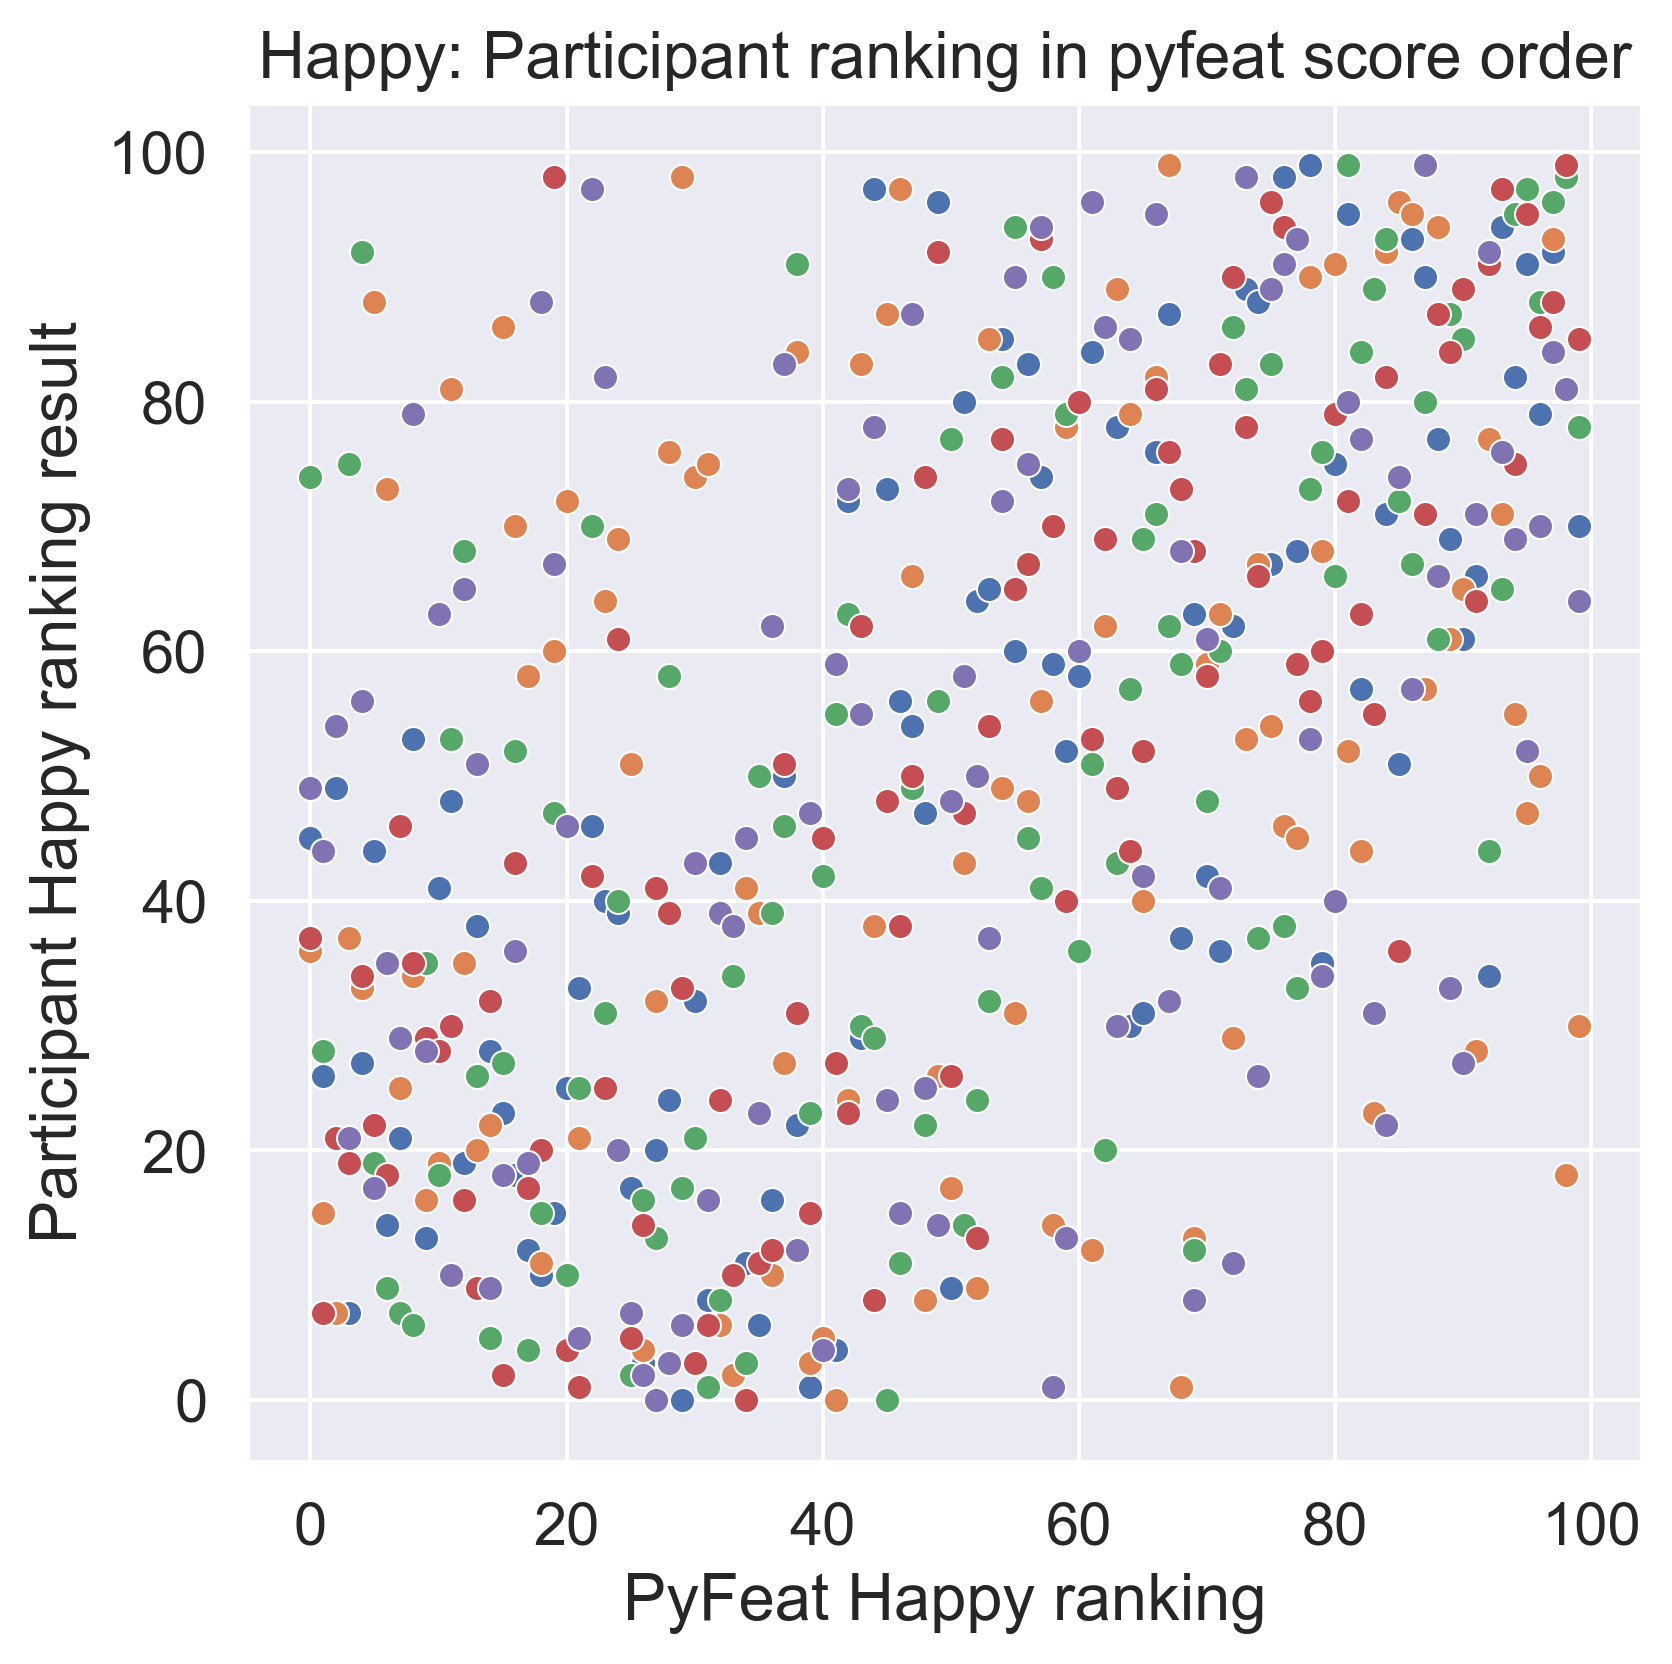

In [187]:
# scatter graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(6, 6), dpi=300)

myexp = 'Happy'
ax.set_title('{}: Participant ranking in pyfeat score order'.format(myexp)) # title
ax.set_xlabel('PyFeat {} ranking'.format(myexp)) # x-axis
ax.set_ylabel('Participant {} ranking result'.format(myexp)) # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    # print(j_data)
    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_data):
        temp_list.append((c, ha_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])

    # temp_list = [x[0] for x in temp_list]
    
    x = [k[1] for k in temp_list]
    y = [m[0][0] for m in temp_list]
    
    # scatter plot
    sns.scatterplot(x, y)
    
    # line chart
    # sns.lineplot(x, y)
    # sns.lineplot(x='num', y='sqr', data=pdnumsqr)


    # break
    plt.savefig('happy_subject{}.png'.format(str(i + 1)), bbox_inches='tight', pad_inches=0, dpi=300)
    

## Linear regression analysis

55796
LinregressResult(slope=0.6651905190519052, intercept=16.57306930693069, rvalue=0.6651905190519052, pvalue=4.4033402325117816e-14, stderr=0.07542543103334502, intercept_stderr=4.322015410141325)
125222
LinregressResult(slope=0.2485928592859286, intercept=37.19465346534653, rvalue=0.2485928592859286, pvalue=0.012632802568902058, stderr=0.09784419050423508, intercept_stderr=5.606651408662864)
71592
LinregressResult(slope=0.5704050405040504, intercept=21.264950495049504, rvalue=0.5704050405040504, pvalue=5.819949322261622e-10, stderr=0.08297024852611588, intercept_stderr=4.754347277837824)
42568
LinregressResult(slope=0.7445664566456646, intercept=12.643960396039603, rvalue=0.7445664566456646, pvalue=6.748350254995953e-19, stderr=0.0674325658349351, intercept_stderr=3.864009587895009)
109250
LinregressResult(slope=0.34443444344434443, intercept=32.45049504950495, rvalue=0.34443444344434443, pvalue=0.0004497009824169302, stderr=0.09483416859095999, intercept_stderr=5.434171637373433)


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

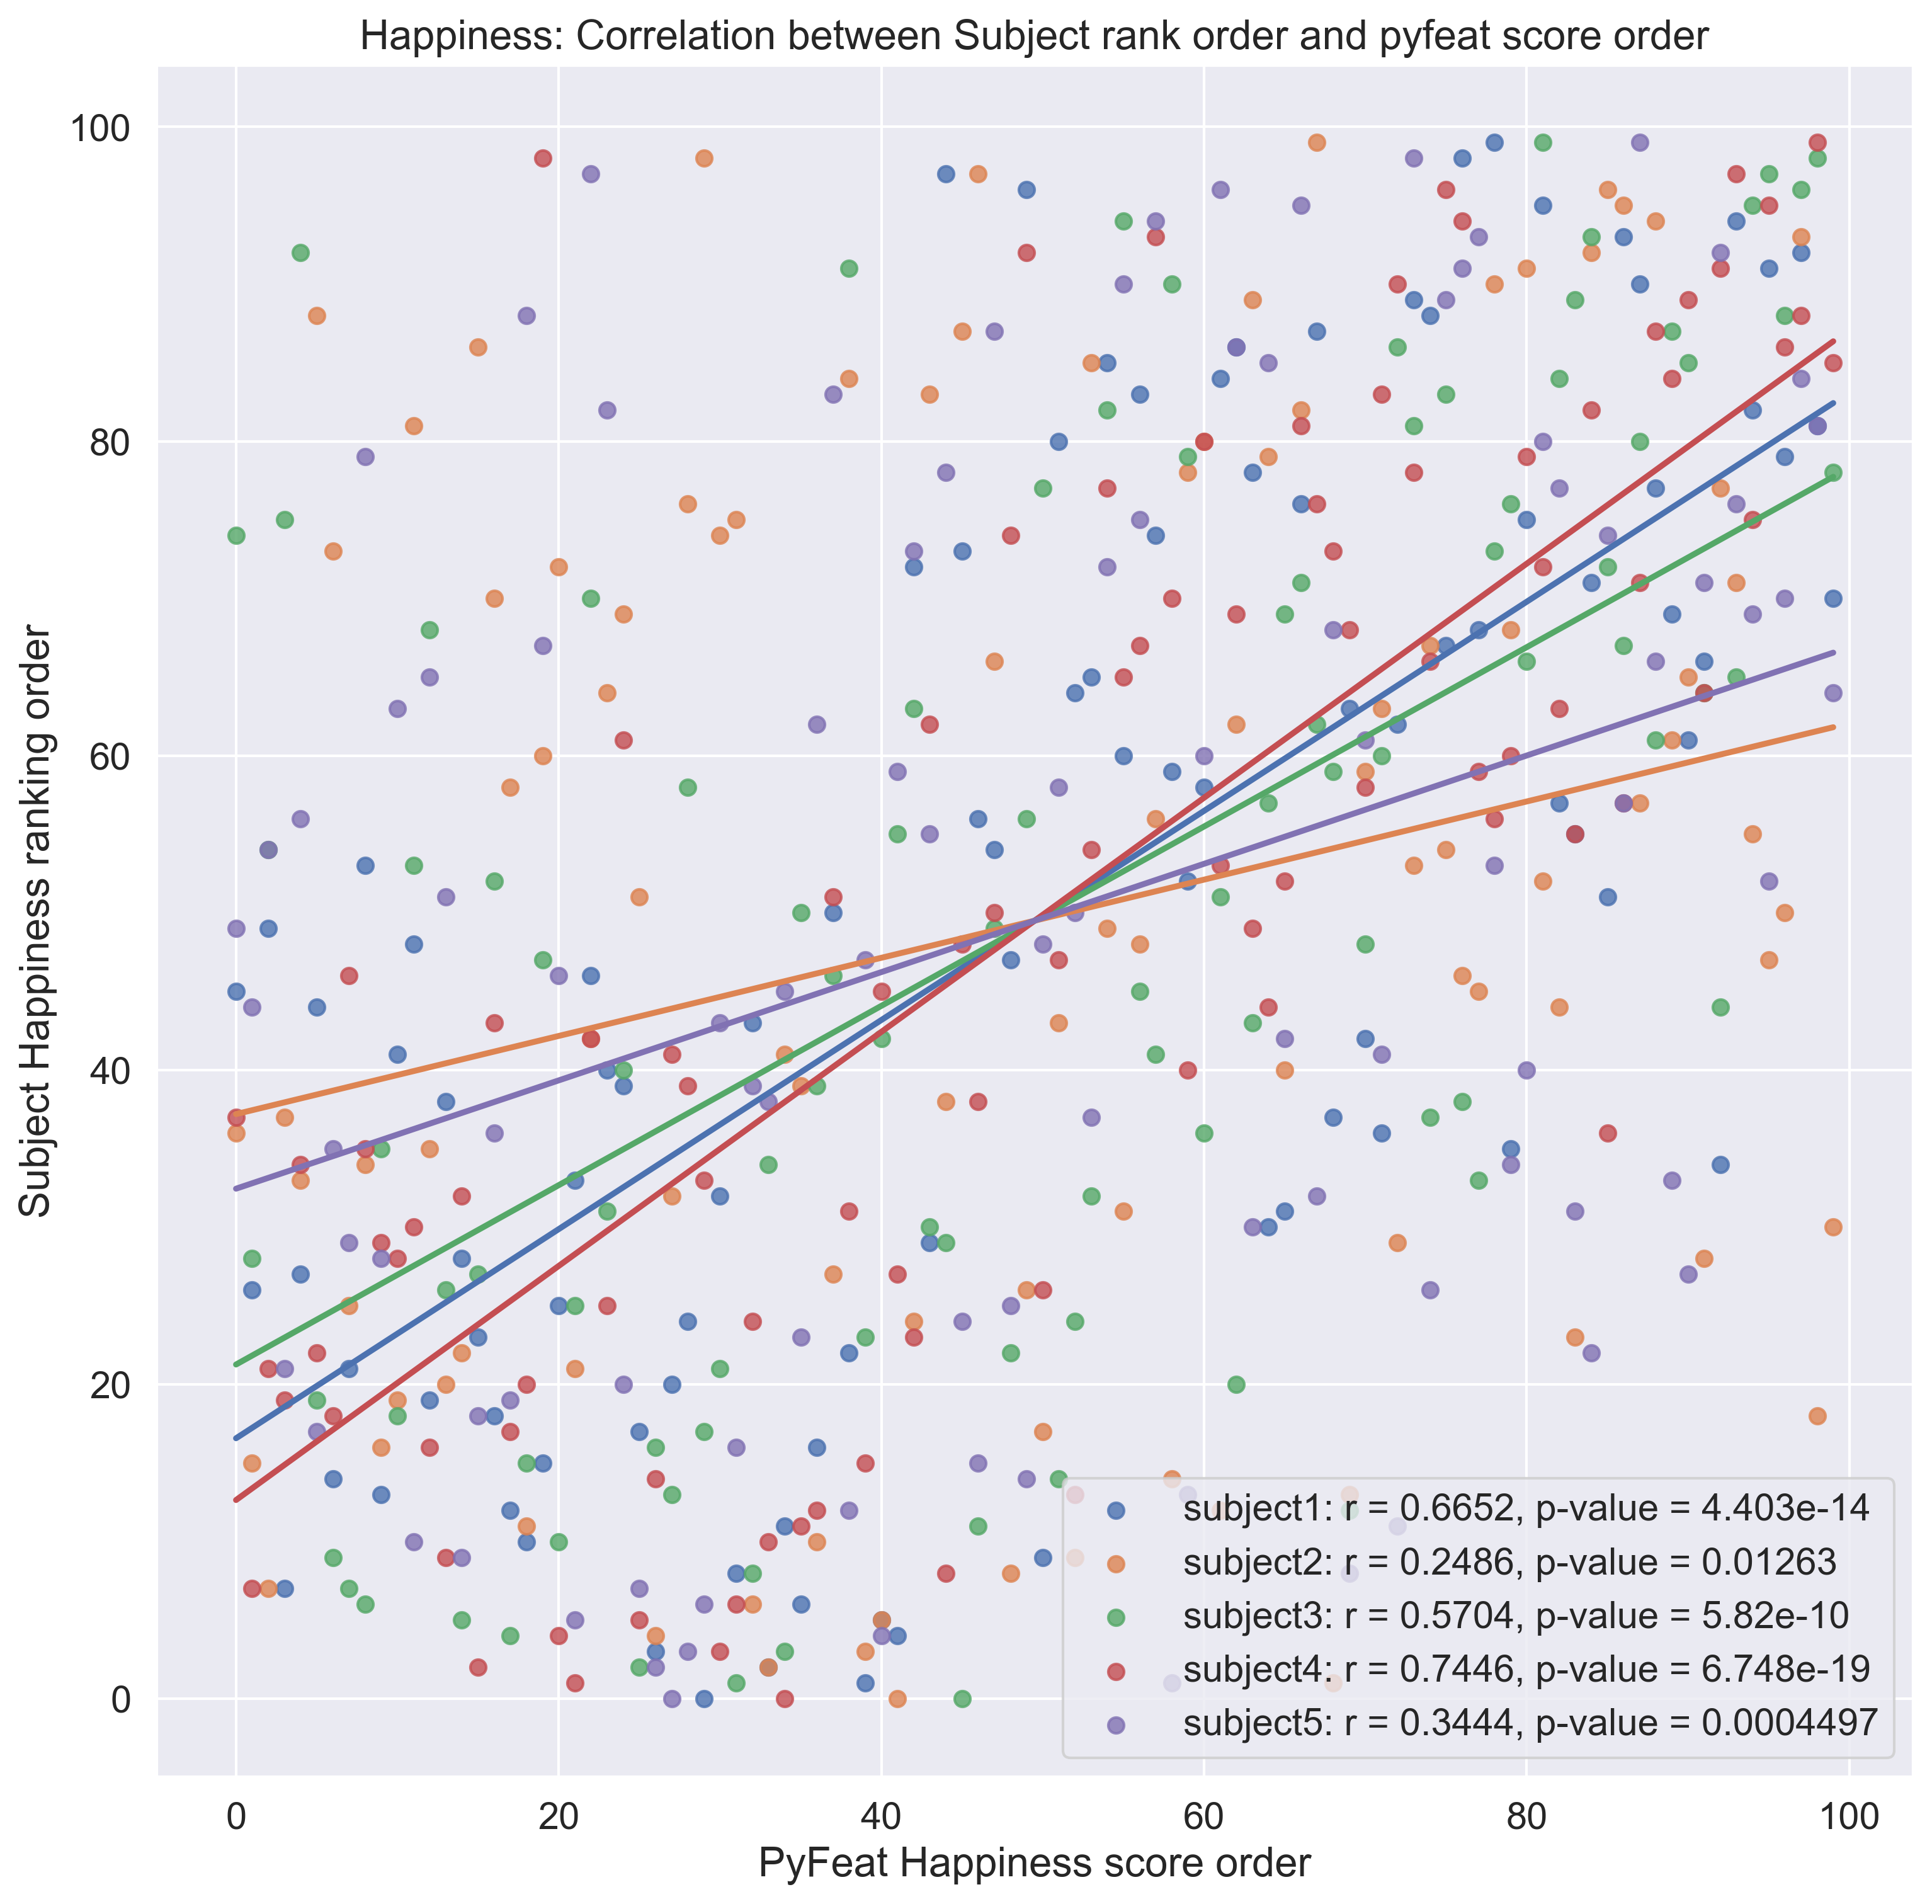

In [189]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats
# print(total_data.head())

sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
# plt.xlim(-0.05, 1.05)
# plt.ylim(1.8, 7.2)
f.set_facecolor('white') # set background color
myexp = 'Happiness'
ax.set_title('{}: Correlation between Subject rank order and pyfeat score order'.format(myexp)) # title
ax.set_xlabel('PyFeat {} score order'.format(myexp)) # x-axis
ax.set_ylabel('Subject {} ranking order'.format(myexp)) # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    # print(j_data)
    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_data):
        temp_list.append((c, ha_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])
    # temp_list = [x[0] for x in temp_list]
    
    x = [k[1] for k in temp_list]
    y = []
    temp_score = 0
    for k in temp_list:
        tmp = abs(k[1] - k[0][0]) ** 2
        temp_score += tmp
        y.append(temp_score)
    
    pier = y[-1]
    print(pier)
    
    
    y = [m[0][0] for m in temp_list]
    
   
    X, y = np.array(x), np.array(y)
    # print(X, y)
    X = X[:, None] # Reshape to 2D as requested
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict response
    predictions = reg.predict(X)
    
    # pearsonr
    #     my_corrcoef = stats.pearsonr(fig_data[0], y)
    #     print('my_corrcoef', my_corrcoef)

    #     my_rho = np.corrcoef(fig_data[0], y)
    #     print('my_rho', my_rho)
    
    # Use stats linregress library
    reg2 = stats.linregress(x, y)
    print(reg2)
    # subject_name
    s_name = 'subject' + str(i + 1) + ':'
    # r is The Pearson correlation coefficient
    sns.regplot(x, y, ci=None, label=s_name + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
    plt.legend()
    # break
# plt.savefig('{}_linear_regression_fitting.png'.format(myexp), bbox_inches='tight', dpi=300)

# Fear

In [ ]:
# cleanedList = generateCleanList(read_json_file('data/1_zhengliang.json'))


# jason
tempjsonfile = read_json_file('data/fear/1_dongagent_fear.txt')
cleanedList = generateCleanList('fear', tempjsonfile)
res_fear1 = mergeFromPairwiseRating(cleanedList)
res_fear1.reverse()

0 done
8 done
9 done
10 done
11 done


In [ ]:
# Imamura
tempjsonfile = read_json_file('data/fear/2_imamura_fear.txt')
cleanedList = generateCleanList('fear', tempjsonfile)
res_fear2 = mergeFromPairwiseRating(cleanedList)
res_fear2.reverse()

0 done
1 done
2 done
3 done
4 done


In [ ]:
# Tanaka
tempjsonfile = read_json_file('data/fear/3_tanaka_fear.txt')
cleanedList = generateCleanList('fear', tempjsonfile)
res_fear3 = mergeFromPairwiseRating(cleanedList)
res_fear3.reverse()

0 done
1 done
2 done
3 done
4 done


In [ ]:
# hirano
tempjsonfile = read_json_file('data/fear/4_hirano_fear.txt')
cleanedList = generateCleanList('fear', tempjsonfile)
res_fear4 = mergeFromPairwiseRating(cleanedList)
res_fear4.reverse()

0 done
1 done
2 done
3 done
4 done


In [ ]:
# sun
tempjsonfile = read_json_file('data/fear/5_sun_fear.txt')
cleanedList = generateCleanList('fear', tempjsonfile)
res_fear5 = mergeFromPairwiseRating(cleanedList)
res_fear5.reverse()

0 done
1 done
2 done
3 done
4 done


In [ ]:
print('Jason\n', res_fear1)
print()
print('Imamura\n', res_fear2)
print()
print('Tanaka\n', res_fear3)
print()
print('Hirano\n', res_fear4)
print()
print('Sun\n', res_fear5)

Jason
 ['fe_313.png', 'fe_260.png', 'fe_181.png', 'fe_356.png', 'fe_53.png', 'fe_396.png', 'fe_91.png', 'fe_385.png', 'fe_93.png', 'fe_59.png', 'fe_472.png', 'fe_174.png', 'fe_427.png', 'fe_29.png', 'fe_5.png', 'fe_16.png', 'fe_202.png', 'fe_147.png', 'fe_499.png', 'fe_232.png', 'fe_475.png', 'fe_185.png', 'fe_43.png', 'fe_150.png', 'fe_380.png', 'fe_30.png', 'fe_484.png', 'fe_382.png', 'fe_39.png', 'fe_17.png', 'fe_110.png', 'fe_362.png', 'fe_431.png', 'fe_451.png', 'fe_287.png', 'fe_197.png', 'fe_376.png', 'fe_193.png', 'fe_449.png', 'fe_159.png', 'fe_125.png', 'fe_441.png', 'fe_477.png', 'fe_390.png', 'fe_173.png', 'fe_406.png', 'fe_249.png', 'fe_22.png', 'fe_90.png', 'fe_408.png', 'fe_381.png', 'fe_349.png', 'fe_10.png', 'fe_393.png', 'fe_211.png', 'fe_7.png', 'fe_1.png', 'fe_473.png', 'fe_128.png', 'fe_238.png', 'fe_151.png', 'fe_364.png', 'fe_84.png', 'fe_95.png', 'fe_46.png', 'fe_143.png', 'fe_345.png', 'fe_237.png', 'fe_204.png', 'fe_11.png', 'fe_153.png', 'fe_2.png', 'fe_420.p

In [ ]:
# sort raw_img_name_list base on the number in the file name
def sortRawImgNameList(raw_img_name_list):
    import re
    def atoi(text):
        return int(text) if text.isdigit() else text

    def natural_keys(text):
        '''
        alist.sort(key=natural_keys) sorts in human order
        http://nedbatchelder.com/blog/200712/human_sorting.html
        (See Toothy's implementation in the comments)
        '''
        return [atoi(c) for c in re.split(r'(\d+)', text)]

    raw_img_name_list.sort(key=natural_keys)
    return raw_img_name_list

# sort the list
raw_img_name_list = ['fe_1.png', 'fe_10.png', 'fe_11.png', 'fe_110.png', 'fe_125.png', 'fe_128.png', 'fe_143.png', 'fe_147.png', 'fe_150.png', 'fe_151.png', 'fe_153.png', 'fe_159.png', 'fe_16.png', 'fe_166.png', 'fe_17.png', 'fe_173.png', 'fe_174.png', 'fe_181.png', 'fe_184.png', 'fe_185.png', 'fe_191.png', 'fe_193.png', 'fe_197.png', 'fe_2.png', 'fe_201.png', 'fe_202.png', 'fe_203.png', 'fe_204.png', 'fe_206.png', 'fe_207.png', 'fe_211.png', 'fe_212.png', 'fe_22.png', 'fe_226.png', 'fe_232.png', 'fe_236.png', 'fe_237.png', 'fe_238.png', 'fe_249.png', 'fe_253.png', 'fe_26.png', 'fe_260.png', 'fe_271.png', 'fe_279.png', 'fe_287.png', 'fe_29.png', 'fe_291.png', 'fe_30.png', 'fe_300.png', 'fe_303.png', 'fe_307.png', 'fe_313.png', 'fe_336.png', 'fe_34.png', 'fe_340.png', 'fe_345.png', 'fe_349.png', 'fe_356.png', 'fe_362.png', 'fe_364.png', 'fe_376.png', 'fe_38.png', 'fe_380.png', 'fe_381.png', 'fe_382.png', 'fe_385.png', 'fe_39.png', 'fe_390.png', 'fe_393.png', 'fe_396.png', 'fe_402.png', 'fe_406.png', 'fe_408.png', 'fe_417.png', 'fe_42.png', 'fe_420.png', 'fe_427.png', 'fe_43.png', 'fe_431.png', 'fe_441.png', 'fe_442.png', 'fe_449.png', 'fe_451.png', 'fe_46.png', 'fe_472.png', 'fe_473.png', 'fe_475.png', 'fe_477.png', 'fe_484.png', 'fe_499.png', 'fe_5.png', 'fe_53.png', 'fe_57.png', 'fe_59.png', 'fe_69.png', 'fe_7.png', 'fe_8.png', 'fe_84.png', 'fe_90.png', 'fe_91.png', 'fe_93.png', 'fe_95.png']

myList = sortRawImgNameList(raw_img_name_list)
print(myList)

['fe_1.png', 'fe_2.png', 'fe_5.png', 'fe_7.png', 'fe_8.png', 'fe_10.png', 'fe_11.png', 'fe_16.png', 'fe_17.png', 'fe_22.png', 'fe_26.png', 'fe_29.png', 'fe_30.png', 'fe_34.png', 'fe_38.png', 'fe_39.png', 'fe_42.png', 'fe_43.png', 'fe_46.png', 'fe_53.png', 'fe_57.png', 'fe_59.png', 'fe_69.png', 'fe_84.png', 'fe_90.png', 'fe_91.png', 'fe_93.png', 'fe_95.png', 'fe_110.png', 'fe_125.png', 'fe_128.png', 'fe_143.png', 'fe_147.png', 'fe_150.png', 'fe_151.png', 'fe_153.png', 'fe_159.png', 'fe_166.png', 'fe_173.png', 'fe_174.png', 'fe_181.png', 'fe_184.png', 'fe_185.png', 'fe_191.png', 'fe_193.png', 'fe_197.png', 'fe_201.png', 'fe_202.png', 'fe_203.png', 'fe_204.png', 'fe_206.png', 'fe_207.png', 'fe_211.png', 'fe_212.png', 'fe_226.png', 'fe_232.png', 'fe_236.png', 'fe_237.png', 'fe_238.png', 'fe_249.png', 'fe_253.png', 'fe_260.png', 'fe_271.png', 'fe_279.png', 'fe_287.png', 'fe_291.png', 'fe_300.png', 'fe_303.png', 'fe_307.png', 'fe_313.png', 'fe_336.png', 'fe_340.png', 'fe_345.png', 'fe_349.pn

In [ ]:
raw_img_score_dic = {x: 0 for x in raw_img_name_list}
print(raw_img_score_dic)

{'fe_1.png': 0, 'fe_2.png': 0, 'fe_5.png': 0, 'fe_7.png': 0, 'fe_8.png': 0, 'fe_10.png': 0, 'fe_11.png': 0, 'fe_16.png': 0, 'fe_17.png': 0, 'fe_22.png': 0, 'fe_26.png': 0, 'fe_29.png': 0, 'fe_30.png': 0, 'fe_34.png': 0, 'fe_38.png': 0, 'fe_39.png': 0, 'fe_42.png': 0, 'fe_43.png': 0, 'fe_46.png': 0, 'fe_53.png': 0, 'fe_57.png': 0, 'fe_59.png': 0, 'fe_69.png': 0, 'fe_84.png': 0, 'fe_90.png': 0, 'fe_91.png': 0, 'fe_93.png': 0, 'fe_95.png': 0, 'fe_110.png': 0, 'fe_125.png': 0, 'fe_128.png': 0, 'fe_143.png': 0, 'fe_147.png': 0, 'fe_150.png': 0, 'fe_151.png': 0, 'fe_153.png': 0, 'fe_159.png': 0, 'fe_166.png': 0, 'fe_173.png': 0, 'fe_174.png': 0, 'fe_181.png': 0, 'fe_184.png': 0, 'fe_185.png': 0, 'fe_191.png': 0, 'fe_193.png': 0, 'fe_197.png': 0, 'fe_201.png': 0, 'fe_202.png': 0, 'fe_203.png': 0, 'fe_204.png': 0, 'fe_206.png': 0, 'fe_207.png': 0, 'fe_211.png': 0, 'fe_212.png': 0, 'fe_226.png': 0, 'fe_232.png': 0, 'fe_236.png': 0, 'fe_237.png': 0, 'fe_238.png': 0, 'fe_249.png': 0, 'fe_253.png'

In [ ]:
# use three participants result to generate a new list
def addScoreFromRes(res, my_dic):
    for i in range(len(res)):
        my_dic[res[i]] += i
    return my_dic

# add score from three participants
raw_img_score_dic = addScoreFromRes(res_fear1, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_fear2, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_fear3, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_fear4, raw_img_score_dic)
raw_img_score_dic = addScoreFromRes(res_fear5, raw_img_score_dic)

# sort the dic
sorted_img_score_dic = sorted(raw_img_score_dic.items(), key=lambda x: x[1], reverse=False)
print(sorted_img_score_dic)
    

[('fe_93.png', 12), ('fe_91.png', 14), ('fe_59.png', 41), ('fe_53.png', 44), ('fe_5.png', 58), ('fe_90.png', 60), ('fe_95.png', 63), ('fe_499.png', 66), ('fe_84.png', 78), ('fe_472.png', 78), ('fe_484.png', 78), ('fe_7.png', 79), ('fe_475.png', 80), ('fe_477.png', 98), ('fe_451.png', 109), ('fe_427.png', 112), ('fe_8.png', 117), ('fe_43.png', 118), ('fe_449.png', 118), ('fe_473.png', 121), ('fe_431.png', 124), ('fe_69.png', 127), ('fe_441.png', 129), ('fe_396.png', 133), ('fe_46.png', 136), ('fe_57.png', 136), ('fe_385.png', 151), ('fe_406.png', 165), ('fe_408.png', 165), ('fe_39.png', 168), ('fe_382.png', 175), ('fe_420.png', 176), ('fe_356.png', 179), ('fe_390.png', 179), ('fe_380.png', 180), ('fe_393.png', 185), ('fe_442.png', 185), ('fe_417.png', 192), ('fe_42.png', 197), ('fe_313.png', 200), ('fe_376.png', 200), ('fe_381.png', 202), ('fe_362.png', 203), ('fe_402.png', 205), ('fe_364.png', 229), ('fe_349.png', 231), ('fe_29.png', 237), ('fe_30.png', 241), ('fe_260.png', 241), ('fe_

In [57]:
aver_5 = [x[0] for x in sorted_img_score_dic]
# aver_3.reverse()
# already reversed
print(aver_5)

['fe_93.png', 'fe_91.png', 'fe_59.png', 'fe_53.png', 'fe_5.png', 'fe_90.png', 'fe_95.png', 'fe_499.png', 'fe_84.png', 'fe_472.png', 'fe_484.png', 'fe_7.png', 'fe_475.png', 'fe_477.png', 'fe_451.png', 'fe_427.png', 'fe_8.png', 'fe_43.png', 'fe_449.png', 'fe_473.png', 'fe_431.png', 'fe_69.png', 'fe_441.png', 'fe_396.png', 'fe_46.png', 'fe_57.png', 'fe_385.png', 'fe_406.png', 'fe_408.png', 'fe_39.png', 'fe_382.png', 'fe_420.png', 'fe_356.png', 'fe_390.png', 'fe_380.png', 'fe_393.png', 'fe_442.png', 'fe_417.png', 'fe_42.png', 'fe_313.png', 'fe_376.png', 'fe_381.png', 'fe_362.png', 'fe_402.png', 'fe_364.png', 'fe_349.png', 'fe_29.png', 'fe_30.png', 'fe_260.png', 'fe_345.png', 'fe_38.png', 'fe_287.png', 'fe_340.png', 'fe_34.png', 'fe_232.png', 'fe_307.png', 'fe_336.png', 'fe_303.png', 'fe_291.png', 'fe_249.png', 'fe_300.png', 'fe_238.png', 'fe_202.png', 'fe_22.png', 'fe_271.png', 'fe_279.png', 'fe_237.png', 'fe_253.png', 'fe_181.png', 'fe_211.png', 'fe_26.png', 'fe_185.png', 'fe_226.png', 'f

In [58]:
print(aver_5[:5])

['fe_93.png', 'fe_91.png', 'fe_59.png', 'fe_53.png', 'fe_5.png']
